## Setting up the environment

Use the existing environment by running in the terminal
    `source /shared/virtualenvs/cnn/bin/activate`

# Load data

Import libraries and functions

In [1]:
import land_cover_models as lcm
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms, utils
from fmix import combine_masks
from my_transformations import RandomCrop, extra_transforms
from models import SiameseNetwork
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

Define constants and paths

In [2]:
# ------------------- CONSTANTS ------------------- #

MEAN=(94.7450, 102.9471,  96.9884)
STD=(31.5119, 24.6287, 19.7533)

LOG_INTERVAL = 10

CROP_SIZE = 128 # RandomCrop transform
BATCH_SIZE = 8
LR = 0.001
EPOCHS=50
SEED=42

# ------------------- DIRECTORY PATHS ------------------- #

ROOT_PATH = '/home/s2254242/PHD/ATI/peak-district-challenge'
dir_test_im_patches = f'{ROOT_PATH}/data/images_detailed_annotation/'
dir_test_mask_patches = f'{ROOT_PATH}/data/masks_detailed_annotation/'
path_mapping_dict=f'{ROOT_PATH}/content/label_mapping_dicts/label_mapping_dict__main_categories__2023-04-20-1541.pkl'

mask_suffix_test_ds = '_lc_2022_detailed_mask.npy'
mask_dir_name_test = ''


Random crop image and normalise images.

In [3]:
# TODO: Dataset train, val, test split

ds = lcm.DataSetPatches(im_dir=dir_test_im_patches, mask_dir=dir_test_mask_patches, 
                                    mask_suffix=mask_suffix_test_ds, mask_dir_name=mask_dir_name_test,
                                #   list_tile_names=dict_tile_names_sample['test'],
                                    list_tile_patches_use=None,
                                    shuffle_order_patches=True, relabel_masks=True,
                                    random_transform_data=True,
                                    subsample_patches=False, # frac_subsample=0.1,
                                    path_mapping_dict=path_mapping_dict,
                                    random_crop=RandomCrop(CROP_SIZE),
                                    mean=MEAN, std=STD)

# Define dataloader
trainloader = torch.utils.data.DataLoader(ds, batch_size=BATCH_SIZE, pin_memory=True,
                                          shuffle=True, num_workers=2)

Patches ordered randomly
Loaded 1027 patches
Loaded label_mapping_dict__main_categories__2023-04-20-1541.pkl to map labels


Iterate over data, and visualise the transformations applied.

In [4]:
# def plot_images():
    

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

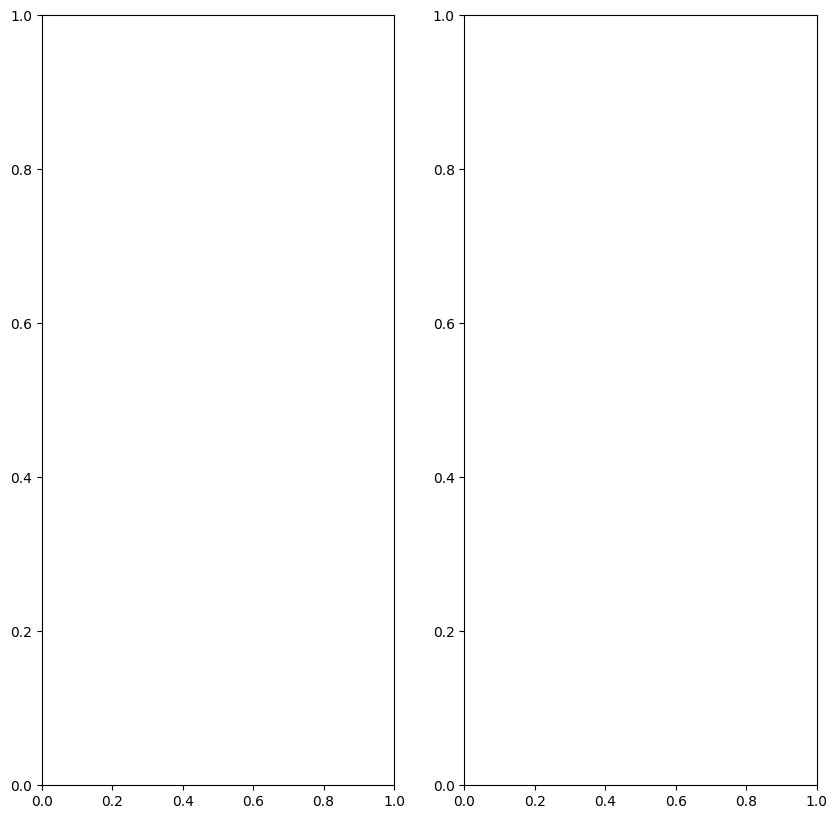

In [5]:
for i in range(2):
    fig, ax = plt.subplots(1,2, figsize=(10,10))
    ax[0].imshow(ds.__getitem__(i)[0][i].permute(1,2,0))#, vmin=0, vmax=1)
    ax[1].imshow(ds.__getitem__(i)[1][i].permute(1,2,0))
    ax[0].set_title('Original image')
    ax[1].set_title('Original mask')
    plt.show()
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


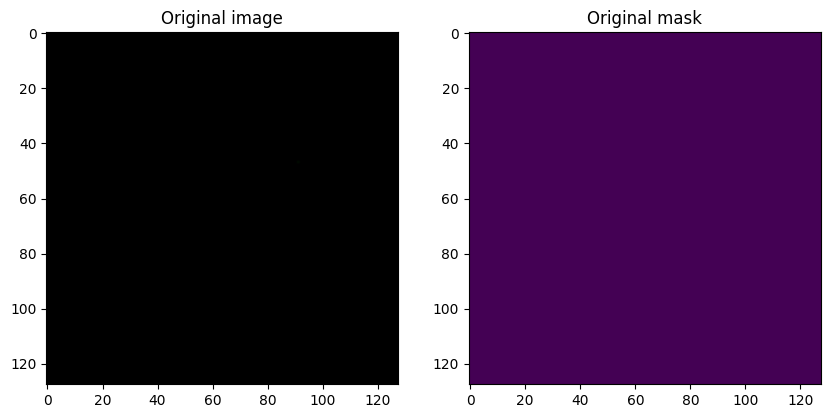

In [9]:
CHOOSE_BATCH_IDX = 2

iterator = iter(trainloader)
i = 0
found = False
while found == False:
    
    batch = next(iterator)
    
    if i == CHOOSE_BATCH_IDX and found == False:
        
        # Plot the origial image and mask
        fig, ax = plt.subplots(1,2, figsize=(10,10))
        ax[0].imshow(batch[0][i].permute(1,2,0))#.type(torch.uint8))#, vmin=0, vmax=1)
        ax[1].imshow(batch[1][i])
        ax[0].set_title('Original image')
        ax[1].set_title('Original mask')
        plt.show()
        
        # Create the artificial augmented image and get the change mask
        # original_image, augmented_image, change_mask = combine_masks(batch, "continuous_fmix")
        found = True
        
    i = i + 1

In [1]:


ROOT_PATH = '/home/s2254242/PHD/ATI/peak-district-challenge'

MEAN=[ 94.7450, 102.9471,  96.9884]
STD=[31.5119, 24.6287, 19.7533]

dir_test_im_patches = f'{ROOT_PATH}/data/images_detailed_annotation/'
dir_test_mask_patches = f'{ROOT_PATH}/data/masks_detailed_annotation/'

mask_suffix_test_ds = '_lc_2022_detailed_mask.npy'
mask_dir_name_test = ''

path_mapping_dict=f'{ROOT_PATH}/content/label_mapping_dicts/label_mapping_dict__main_categories__2023-04-20-1541.pkl'

ds = lcm.DataSetPatches(im_dir=dir_test_im_patches, mask_dir=dir_test_mask_patches, 
                                    mask_suffix=mask_suffix_test_ds, mask_dir_name=mask_dir_name_test,
                                #   list_tile_names=dict_tile_names_sample['test'],
                                    list_tile_patches_use=None,
                                    shuffle_order_patches=True, relabel_masks=True,
                                    subsample_patches=False, # frac_subsample=0.1,
                                    path_mapping_dict=path_mapping_dict
                                    )



Patches ordered randomly
Loaded 1027 patches
Loaded label_mapping_dict__main_categories__2023-04-20-1541.pkl to map labels


In [2]:
from my_transformations import Rescale, RandomCrop, ToTensor

In [3]:
batch_size = 16
trainloader = torch.utils.data.DataLoader(ds, batch_size=batch_size)

In [4]:
batch = next(iter(trainloader))

38 69


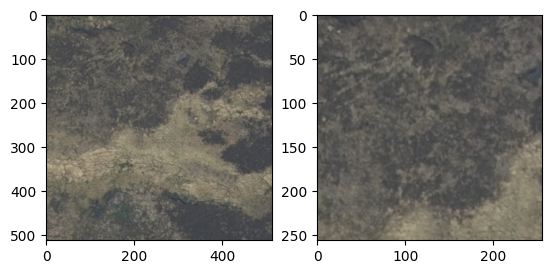

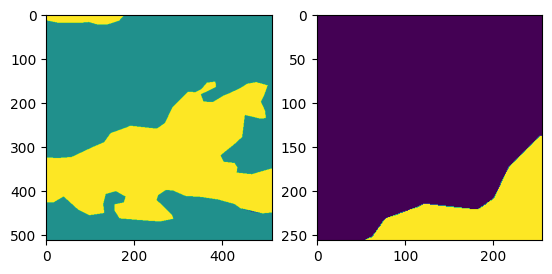

In [7]:
from my_transformations import Rescale, RandomCrop, ToTensor
img, mask = (batch[0][0],batch[1][0])
img_1, mask_1 = RandomCrop(output_size=256)((batch[0][0],batch[1][0]))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(img.permute(1,2,0).type(torch.uint8))
ax[1].imshow(img_1.permute(1,2,0).type(torch.uint8))
plt.show()

fig, ax = plt.subplots(1,2)
ax[0].imshow(mask.type(torch.uint8))
ax[1].imshow(mask_1.type(torch.uint8))
plt.show()

In [23]:
import matplotlib.pyplot as plt


In [24]:
mask_1

tensor([[3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3],
        ...,
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3]])

In [ ]:

batch_size = 16
trainloader = torch.utils.data.DataLoader(ds, batch_size=batch_size)

transform=transforms.Compose([Rescale(256),
                              RandomCrop(224),
                              ToTensor()
                              ]))

# Train the model
n_epochs = 200
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.train()
for epoch in range(n_epochs):
    for batch in loader:
        
        img1, img2, label = combine_masks(batch, "continuous_fmix")
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model.eval()